In [1]:
# Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pickle as pkl
from matplotlib.ticker import (LogLocator)
from IPython.display import HTML
mpl.rcParams.update({'font.size': 14})

## Playing with distributions in tensorflow 
want to distribute r log-normally, with more emphasis on end early epochs and low r for later epochs

In [7]:
dist = tfp.distributions.Beta(1.5, 4.5)

# plt.plot(dist)

NameError: name 'tfp' is not defined

[  0.4         13.68888889  26.97777778  40.26666667  53.55555556
  66.84444444  80.13333333  93.42222222 106.71111111 120.        ]


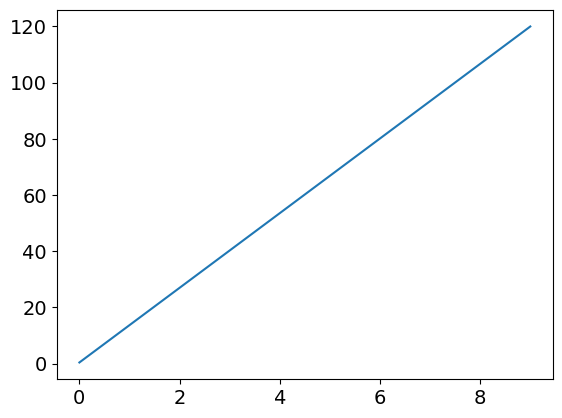

In [8]:
data = np.linspace(0.4, 120, 10)
print(data)

plt.plot(data)

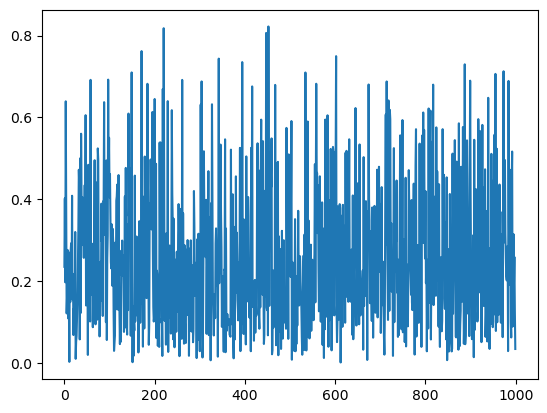

In [29]:
sampled_data = dist.sample(1000)

# print(sampled_data)

plt.plot(sampled_data)

## Playing with creating correct J function to compare to

In [2]:
with open('figures/f_boundary.pkl', 'rb') as file:
    f_boundary = pkl.load(file)
    
with open('figures/p.pkl', 'rb') as file:
    p = pkl.load(file)
    
with open('figures/T.pkl', 'rb') as file:
    T = pkl.load(file)
    
with open('figures/r.pkl', 'rb') as file:
    r = pkl.load(file)
    
f_boundary = np.exp(f_boundary)
p = np.exp(p)
T = np.exp(T)
r = np.exp(r)

---------------------------------


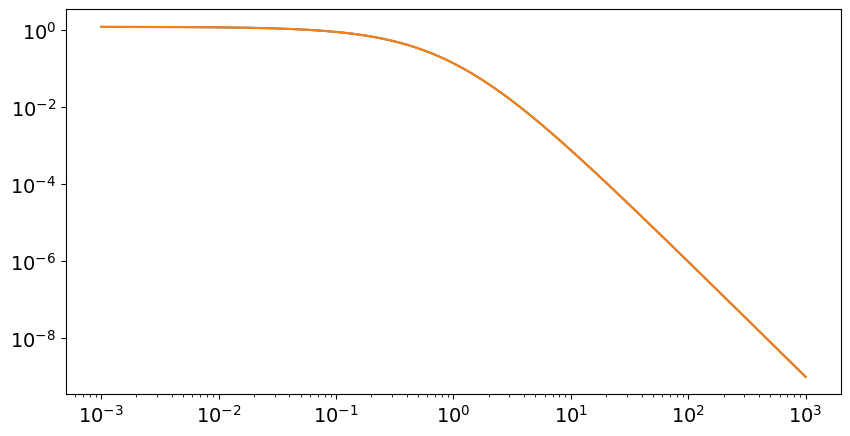

In [5]:
size = len(p[:, 0])
m = 0.938 # GeV/c^2

# Initialize J
J = np.zeros((size, size))
J_boundary = (f_boundary*(p**2))[:, 0]

def phi_func(r):
    k_0 = 1e11
    func = np.log((120*150e6)/r)*((150e6*400)/(3*k_0))
    return func

# For each r, get phi
for i in range(size):
    phi = phi_func(r[i])
    
    # for each T, calculate J[r, T]
    for j in range(size):
        where_phi = np.argmin(np.abs(T[:, 0] - (T[j, 0] + phi)))
        J[i, j] = ((T[j, 0]*(T[j, 0]+2*m))/((T[j, 0]+phi)*(T[j, 0]+phi+2*m))) * J_boundary[where_phi]

# Plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.loglog(T, f_boundary*(p**2), label='True boundary condition (r=120 au)')
ax.loglog(T[:, 0], J[-1, :], label='J boundary condition (r=120 au)')
ply.legend()

plt.show()

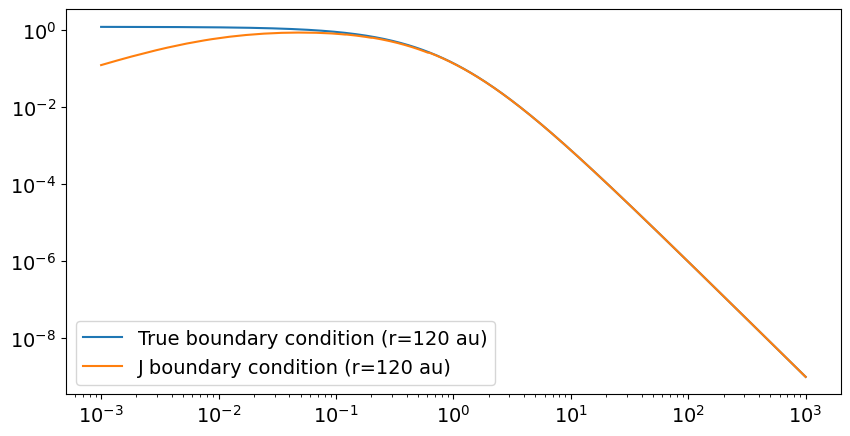

In [10]:
# Plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.loglog(T, f_boundary*(p**2), label='True boundary condition (r=120 au)')
ax.loglog(T[:, 0], J[0, :], label='J boundary condition (r=120 au)')
plt.legend()

plt.show()